# Minimum Distances

https://www.hackerrank.com/challenges/minimum-distances/problem

## Problem
We define the distance between two array values as the number of indices between the two values. Given $\alpha$, find the minimum distance between any pair of equal elements in the array. If no such value exists, print $-1$.
For example, if $\alpha = [3,2,1,2,3]$, there are two matching pairs of values: $3$ and $2$. The indices of the $3$s are $i = 0$ and $j = 4$, so their distance is $d[i,j] = |j-i| = 4$. The indices of the $2$s are $i = 1$ and $j = 3$, so their distance is $d[i,j] = |j-1| = 2$.

## Function Description
Complete the minimumDistances function in the editor below. It should return the minimum distance between any two matching elements.
minimumDistances has the following parameter(s):
* a: an array of integers

## Input Format
The first line contains an intenger $n$, the size of array $a$.
The second line contains $n$ space-separated integers $a[i]$.

## Constraints
* $1 \leq n \leq 10^3$
* $1 \leq a[i] \leq 10^5$

## Output Format
Print a single integer denoting the minimum $d[i,j]$ in $a$. If no such value exists, print $-1$.

## Sample Input
```
6
7 1 3 4 1 7
```

## Sammple Output
```
3
```

## Explanation
Here, we have two options:
* $a[1]$ and $a[4]$ are both $1$, so $d[1,4] = |1 - 4|=3$
* $a[0]$ and $a[5]$ are both $7$, so $d[0,5] = |0 - 5|=5$

The answer is $min(3,5)=3$.

In [36]:
# Simple naive solution. Time complexity O(n^2).
def minimumDistances_1(a):
    min_distance = len(a) + 1
    for i in range(len(a)):
        elem_i = a[i]
        for j in range(i, len(a)):
            if j == i:
                continue
            elem_j = a[j]
            if (elem_i == elem_j):
                distance = abs(j - i)
                if (distance < min_distance):
                    min_distance = distance
    if (min_distance > len(a)):
        return -1
    return min_distance

In [38]:
# Same as the previous, but optimized.
def minimumDistances_2(a):
    min_distance = len(a) + 1
    for i in range(len(a)):
        elem_i = a[i]
        for j in range(i, len(a)):
            if j == i:
                continue
            if (min_distance > 0 and min_distance < abs(j - i)):
                break
            elem_j = a[j]
            if (elem_i == elem_j):
                distance = abs(j - i)
                if (distance < min_distance):
                    min_distance = distance
    if (min_distance > len(a)):
        return -1
    return min_distance

In [40]:
# Uses more memory, but time complexity is O(n).
def minimumDistances_3(a):
    min_distance = len(a) + 1
    last_occurrence = {}
    for i in range(len(a)):
        elem_i = a[i]
        if elem_i in last_occurrence:
            distance = abs(i - last_occurrence[elem_i])
            min_distance = min(distance, min_distance)
        last_occurrence[elem_i] = i
    if (min_distance > len(a)):
        return -1
    return min_distance

In [52]:
# Check all implementations return the same results.
a = [randint(1, 100000) for i in range(10000)]
print(minimumDistances_1(a))
print(minimumDistances_2(a))
print(minimumDistances_3(a))

13
13
13


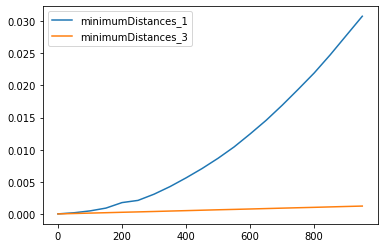

In [51]:
import random
from random import randint
import matplotlib.pyplot as plt

def timereps(func, reps):
    from time import time
    start = time()
    for i in range(0, reps):
        func()
    end = time()
    return (end - start) / reps

def benchmark(func):
    ns = []
    times = []
    for n in range(1, 1000, 50):
        ns.append(n)
        times.append(timereps(lambda: func([randint(1, 10000) for i in range(n)]), 20))
    return ns, times

ns, times = benchmark(minimumDistances_1)
plt.plot(ns, times, label='minimumDistances_1')

# ns, times = benchmark(minimumDistances_2)
# plt.plot(ns, times, label='minimumDistances_2')

ns, times = benchmark(minimumDistances_3)
plt.plot(ns, times, label='minimumDistances_3')

plt.legend()